In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [23]:
df = pd.read_csv("diabetes.csv")

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
print("\nClass distribution:")
print(df['Outcome'].value_counts())

print("Percentage:")
print(f"{(df['Outcome'].value_counts(normalize=True)*100)}")


Class distribution:
Outcome
0    500
1    268
Name: count, dtype: int64
Percentage:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


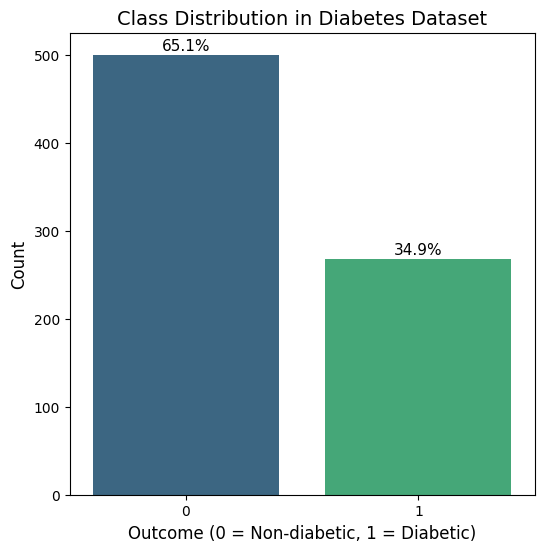

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outcome', data=df, palette='viridis', hue='Outcome', legend=False)

plt.title('Class Distribution in Diabetes Dataset', fontsize=14)
plt.xlabel('Outcome (0 = Non-diabetic, 1 = Diabetic)', fontsize=12)
plt.ylabel('Count', fontsize=12)

total = len(df)
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    plt.text(p.get_x() + p.get_width()/2, p.get_height() + 5, percentage,
             ha='center', fontsize=11)

plt.show()

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

### Base Model

In [34]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("=== Baseline Model (No Resampling) ===")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

=== Baseline Model (No Resampling) ===
[[130  20]
 [ 37  44]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.54      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.75       231

Accuracy: 0.7532467532467533


### Random Under Sampling

In [35]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model.fit(X_train_rus, y_train_rus)
y_pred_rus = model.predict(X_test)

print("\n=== Random Under Sampling ===")
print(confusion_matrix(y_test, y_pred_rus))
print(classification_report(y_test, y_pred_rus))
print("Accuracy:", accuracy_score(y_test, y_pred_rus))


=== Random Under Sampling ===
[[109  41]
 [ 15  66]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       150
           1       0.62      0.81      0.70        81

    accuracy                           0.76       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.79      0.76      0.76       231

Accuracy: 0.7575757575757576


### Random Over Sampling

In [36]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

model.fit(X_train_ros, y_train_ros)
y_pred_ros = model.predict(X_test)

print("\n=== Random Over Sampling ===")
print(confusion_matrix(y_test, y_pred_ros))
print(classification_report(y_test, y_pred_ros))
print("Accuracy:", accuracy_score(y_test, y_pred_ros))


=== Random Over Sampling ===
[[121  29]
 [ 31  50]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       150
           1       0.63      0.62      0.62        81

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Accuracy: 0.7402597402597403


### SMOTE (Synthetic Minority Oversampling Technique)

In [37]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model.fit(X_train_smote, y_train_smote)
y_pred_smote = model.predict(X_test)

print("\n=== SMOTE ===")
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))
print("Accuracy:", accuracy_score(y_test, y_pred_smote))


=== SMOTE ===
[[117  33]
 [ 26  55]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       150
           1       0.62      0.68      0.65        81

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

Accuracy: 0.7445887445887446
